# Spectrometer responses

This notebook plots output of the `refspec/test/test_responses.cpp` file.
It plots responses for varying number of taps and notch filter on/off.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import glob
font = {'family' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [2]:
def fname_proc(fn):
    toret = []
    for key in fn.replace('.dat','').split('_'):
        try:
            a=int(key)
        except:
            try:
                a=float(key)
            except:
                continue
        toret.append(a)
    return tuple(toret)

res = {}
for fname in glob.glob('responses/*.dat'):
    key = fname_proc(fname)
    data = np.loadtxt(fname)
    data[:,1]/=(data[:,1].sum()*0.01)
    res [key]=data

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


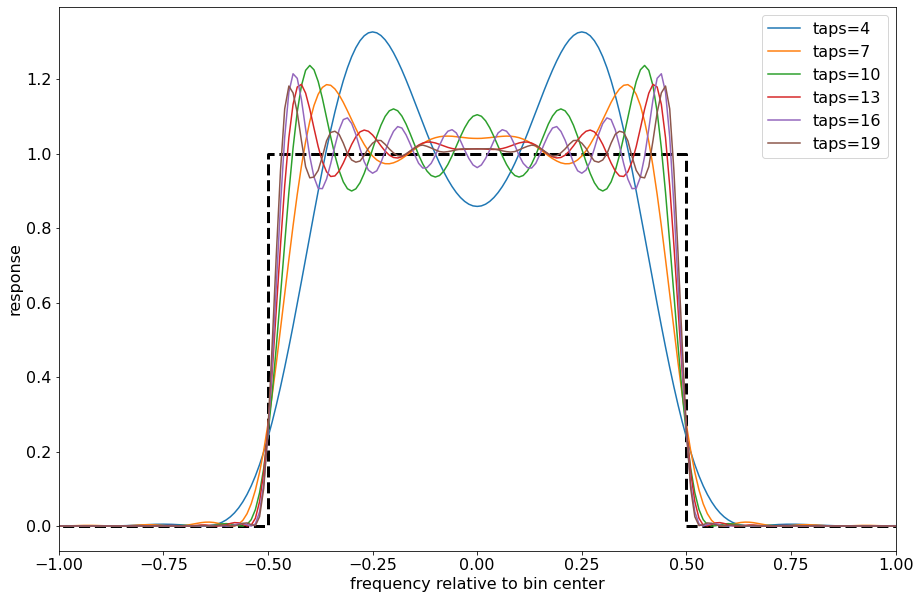

In [3]:
plt.figure(figsize=(15,10))
plt.plot([-3,-0.5,-0.5,+0.5,+0.5,+3],[0,0,1,1,0,0],'k--',lw=3)
for ntaps in range(4,21,3):
    plt.plot(res[(ntaps,0)][:,0],res[(ntaps,0)][:,1], label=f'taps={ntaps}')
    
plt.xlim(-1.0,1.0)
plt.xlabel('frequency relative to bin center')
plt.ylabel('response')
plt.legend()

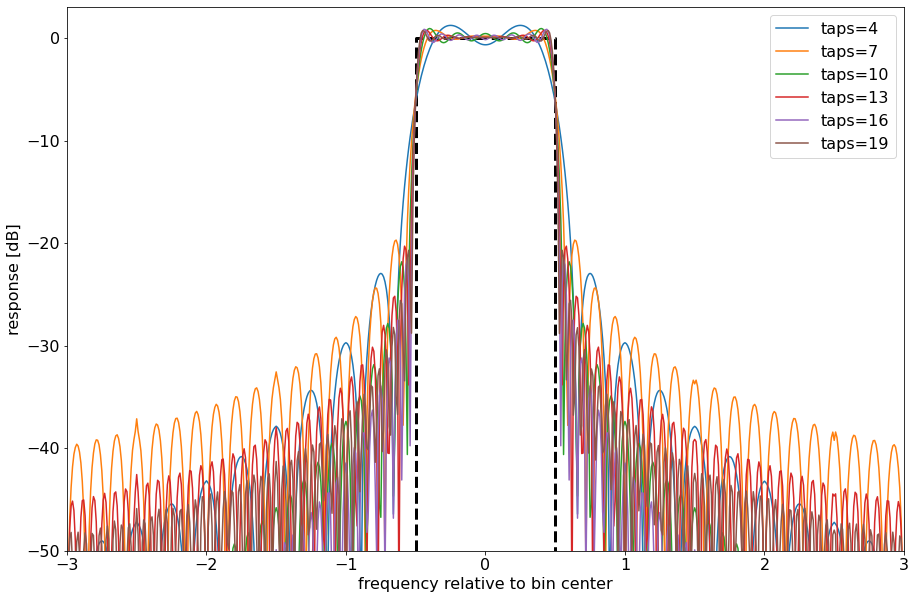

In [4]:
plt.figure(figsize=(15,10))
plt.plot([-0.5,-0.5,+0.5,+0.5,],[-50,0,0,-50],'k--',lw=3)
for ntaps in range(4,21,3):
    plt.plot(res[(ntaps,0)][:,0],np.log10(res[(ntaps,0)][:,1])*10, label=f'taps={ntaps}')
plt.xlim(-3.0,3.0)

plt.ylim(-50,3)
plt.xlabel('frequency relative to bin center')
plt.ylabel('response [dB]')
plt.legend()

Text(0, 0.5, 'response [dB]')

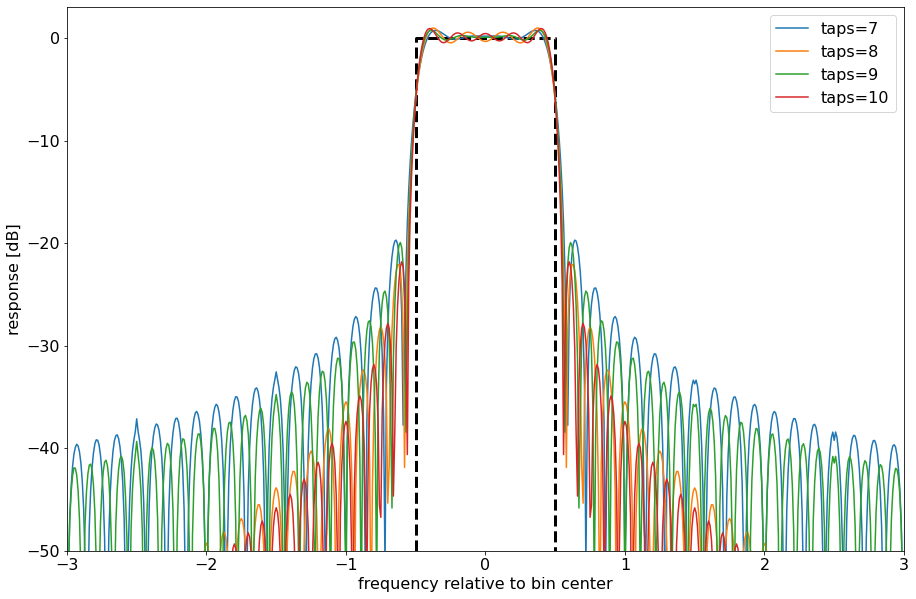

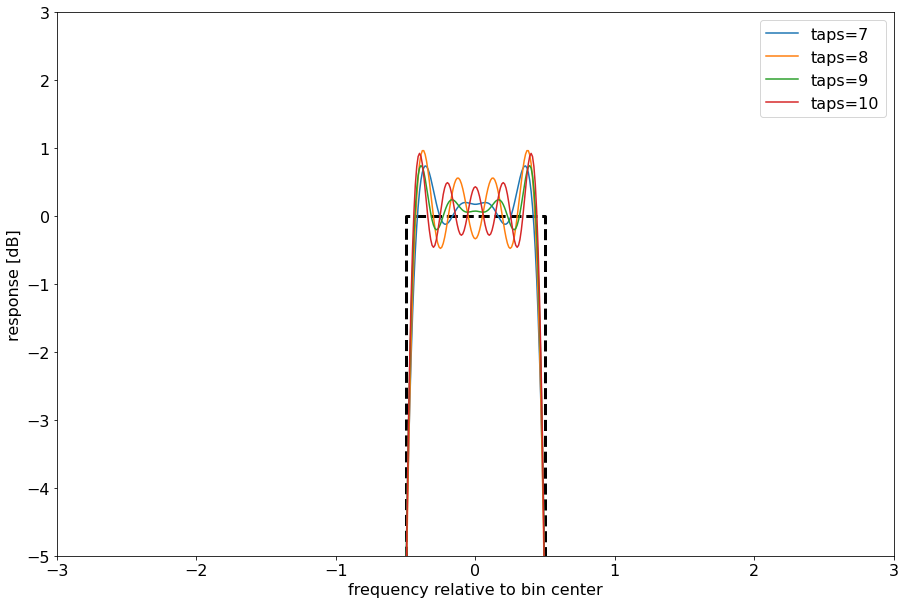

In [5]:
plt.figure(figsize=(15,10))
plt.plot([-0.5,-0.5,+0.5,+0.5,],[-50,0,0,-50],'k--',lw=3)
for ntaps in [7,8,9,10]:
    plt.plot(res[(ntaps,0)][:,0],np.log10(res[(ntaps,0)][:,1])*10, label=f'taps={ntaps}')
plt.xlim(-3.0,3.0)
plt.ylim(-50,3)
plt.legend()
plt.xlabel('frequency relative to bin center')
plt.ylabel('response [dB]')

plt.figure(figsize=(15,10))
plt.plot([-0.5,-0.5,+0.5,+0.5,],[-50,0,0,-50],'k--',lw=3)
for ntaps in [7,8,9,10]:
    plt.plot(res[(ntaps,0)][:,0],np.log10(res[(ntaps,0)][:,1])*10, label=f'taps={ntaps}')
plt.xlim(-3.0,3.0)
plt.ylim(-5,3)
plt.legend()
plt.xlabel('frequency relative to bin center')
plt.ylabel('response [dB]')

/tmp/ipykernel_175/3699137685.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(res[(ntaps,1)][:,0],np.log10(res[(ntaps,1)][:,1])*10, label=f'taps={ntaps} w notch')


Text(0, 0.5, 'response [dB]')

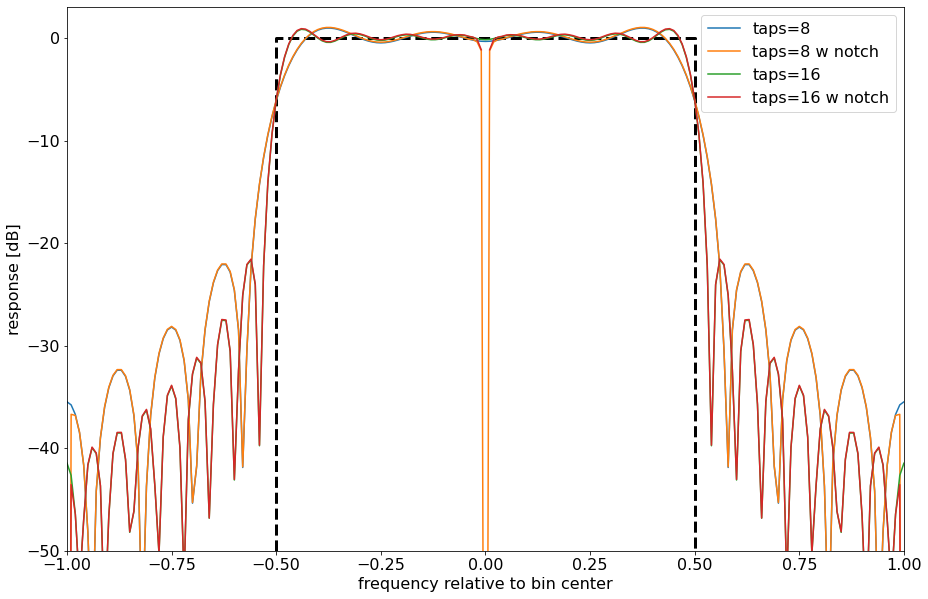

In [6]:
plt.figure(figsize=(15,10))
plt.plot([-0.5,-0.5,+0.5,+0.5,],[-50,0,0,-50],'k--',lw=3)
for ntaps in [8,16]:
    plt.plot(res[(ntaps,0)][:,0],np.log10(res[(ntaps,0)][:,1])*10, label=f'taps={ntaps}')
    plt.plot(res[(ntaps,1)][:,0],np.log10(res[(ntaps,1)][:,1])*10, label=f'taps={ntaps} w notch')
plt.xlim(-1.0,1.0)
plt.ylim(-50,3)
plt.legend()
plt.xlabel('frequency relative to bin center')
plt.ylabel('response [dB]')
